In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [2]:
def DADOS(url:str):
    df = pd.read_csv(url,sep = ';')
    df = df.drop(['VCasa',"ECasa","DCasa","GPCasa","GCCasa",
                  "PtCasa","VFora","EFora","DFora","GPFora",
                  "GCFora","PtFora"],axis=1)
    df.iloc[:,4:37]=df.iloc[:,4:37]/38
    df.iloc[:,2]=df.iloc[:,2]/10
    return df

In [9]:
df19 = DADOS('.\Dados\dados2019.csv')

In [17]:
scaler = MaxAbsScaler().fit(df19.iloc[:,1:37])

In [28]:
a = scaler.transform(df19.iloc[:,1:37])

In [29]:
df191 = df19
df191.iloc[:,1:37]=a

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=19)
model.fit(a,df19.Pt)

RandomForestRegressor(max_depth=19, random_state=1)

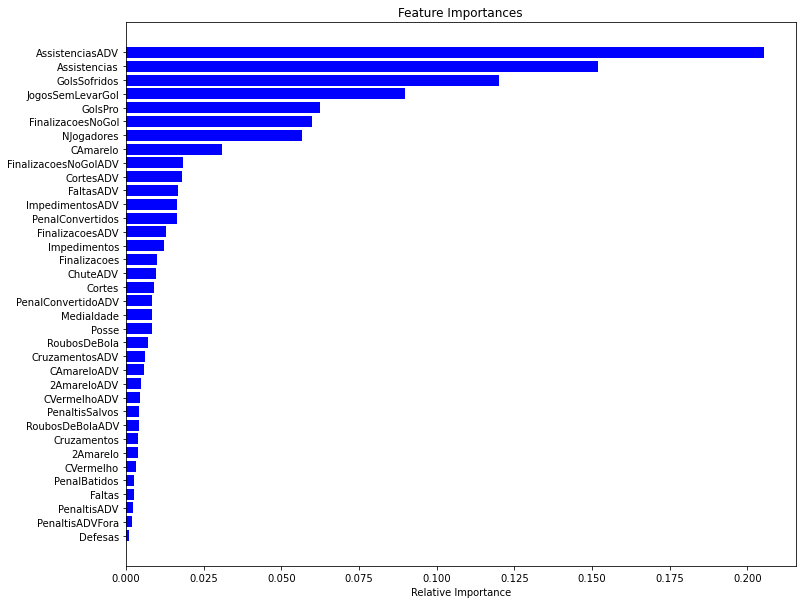

In [27]:
features = df19.columns[1:37]
importances = model.feature_importances_
indices = np.argsort(importances) #[0:9])  # top 10 features
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.xmin = [0.01]
plt.show()

In [35]:
from sklearn.feature_selection import SelectFromModel
new_model = SelectFromModel(model,threshold=0.005)
fit = new_model.fit_transform(a, df19.Pt)
new_model.get_support()
selected_columns = np.array(df19.columns[1:37])[new_model.get_support()]
df3 = df191[selected_columns]
pd.options.mode.chained_assignment = None
#df3['Pt'] = df19['Pt']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NJogadores            20 non-null     float64
 1   MediaIdade            20 non-null     float64
 2   Posse                 20 non-null     float64
 3   GolsPro               20 non-null     float64
 4   Assistencias          20 non-null     float64
 5   PenalConvertidos      20 non-null     float64
 6   CAmarelo              20 non-null     float64
 7   GolsSofridos          20 non-null     float64
 8   AssistenciasADV       20 non-null     float64
 9   PenalConvertidoADV    20 non-null     float64
 10  CAmareloADV           20 non-null     float64
 11  ChuteADV              20 non-null     float64
 12  JogosSemLevarGol      20 non-null     float64
 13  Finalizacoes          20 non-null     float64
 14  FinalizacoesNoGol     20 non-null     float64
 15  FinalizacoesADV       20 

In [33]:
df3

,NJogadores,GolsPro,Assistencias,PenalConvertidos,CAmarelo,GolsSofridos,AssistenciasADV,JogosSemLevarGol,FinalizacoesNoGol,FinalizacoesADV,FinalizacoesNoGolADV,Impedimentos,FaltasADV,ImpedimentosADV,CortesADV,Pt
0,0.729167,0.677419,0.769231,0.333333,0.581197,0.603774,0.621622,1.000000,0.804762,0.653846,0.634409,0.942857,0.888591,0.922222,1.000000,61
1,0.583333,0.693548,0.717949,0.333333,0.769231,0.528302,0.432432,0.944444,0.823810,0.741987,0.698925,0.871429,0.852349,0.555556,0.830266,62
2,0.562500,0.596774,0.564103,0.666667,0.726496,0.698113,0.756757,0.888889,0.647619,0.756410,0.704301,0.757143,0.832215,0.377778,0.811861,50
3,0.666667,1.000000,1.000000,0.833333,0.675214,0.509434,0.405405,1.000000,1.000000,0.616987,0.623656,0.628571,0.738255,0.900000,0.920245,75
4,0.687500,0.467742,0.435897,0.333333,0.914530,0.849057,0.864865,0.611111,0.528571,0.844551,0.865591,0.785714,0.888591,0.700000,0.865031,44
5,0.812500,0.709677,0.794872,0.333333,0.760684,0.811321,0.756757,0.722222,0.685714,1.000000,0.956989,0.985714,0.813423,0.555556,0.732106,55
6,0.833333,0.741935,0.948718,0.500000,0.897436,0.641509,0.594595,0.833333,0.695238,0.863782,0.666667,0.857143,0.758389,0.522222,0.858896,66
7,0.687500,0.467742,0.512821,0.500000,0.931624,0.679245,0.675676,0.500000,0.595238,0.732372,0.672043,0.728571,0.832215,0.644444,0.840491,39
8,0.812500,0.629032,0.641026,0.833333,0.717949,0.754717,0.702703,0.722222,0.780952,0.737179,0.677419,1.000000,0.727517,0.600000,0.807771,52
9,0.916667,0.500000,0.564103,0.166667,0.735043,0.603774,0.621622,0.777778,0.633333,0.762821,0.693548,0.700000,0.951678,0.533333,0.777096,41
